# Annotation Processing Notebook
This notebook is used to process the annotated audio data. There will be four data csv files, one done by each member of the group. We will read in the "label" column from each of the self-annotated columns and perform two averages (mean and median) and have those be the true label to the data. 

Since the data was randomized in ordering for annotation, we should take care to **SORT THE COLUMNS** so that they line up again. 

We will then create a dataframe where column 1 is the filename, and column 2 will be the average annotated value. This will then be passed into the audio ML model for training.

In [ ]:
# First, let's import all the libraries we will be working with.

import pandas as pd
import numpy as np

In [ ]:
# Let's set up the dictionary mapping to convert labels to numbers, since
# we can't average strings! We'll use the circumplex unit interval.
binlabels = {"Not agitated":-1, 
             "Slightly agitated":-0.6, 
             "Moderately agitated":-0.2, 
             "Significantly agitated":0.2, 
             "Highly agitated":0.6, 
             "Extremely agitated":1.0}

# We begin by reading in all of the csv files.

names = ["john", "kodai", "sam", "tanishk"]

base_path = "./drive/MyDrive/CMPT419/data/"
john_csv = base_path+names[0]+".csv"
kodai_csv = base_path+names[1]+".csv"
sam_csv = base_path+names[2]+".csv"
tanishk_csv = base_path+names[3]+".csv"

group_csv_paths = [john_csv, kodai_csv, sam_csv, tanishk_csv]
dframes = []
for csv in group_csv_paths:
  csvfile = pd.read_csv(csv)
  dframes.append(csvfile)

# Now, we should have a list of csv files. 
# We begin by sorting the dataframes according to filenames (url column).
for i, dframe in enumerate(dframes):
  dframe["url"] = dframe["url"].map(lambda x: x.split('-',1)[1])
  dframe = dframe.replace({"label":binlabels})
  dframes[i] = dframe.sort_values("url")

# Did the sort work correctly? Let's print them out.
for i, dframe in enumerate(dframes):
  outcols = dframe[dframe.columns[np.r_[0, 2]]].head(10)
  print(f"Dataframe {i+1}\n{outcols}\n")


Dataframe 1
               url  label
109   s10_an_1.wav    0.2
875   s10_an_2.wav    0.2
1223  s10_an_3.wav    0.6
447   s10_an_4.wav    0.6
442   s10_an_5.wav    0.2
619   s10_di_1.wav   -0.2
222   s10_di_2.wav   -0.2
17    s10_di_3.wav   -0.2
702   s10_di_4.wav   -0.2
540   s10_di_5.wav   -0.2

Dataframe 2
               url  label
1016  s10_an_1.wav    0.2
1015  s10_an_2.wav    0.2
1014  s10_an_3.wav   -0.2
1013  s10_an_4.wav   -0.2
1012  s10_an_5.wav   -0.2
1011  s10_di_1.wav   -0.2
1010  s10_di_2.wav   -0.6
1009  s10_di_3.wav   -0.6
1008  s10_di_4.wav   -0.2
1007  s10_di_5.wav   -0.6

Dataframe 3
               url  label
190   s10_an_1.wav    0.6
382   s10_an_2.wav    1.0
682   s10_an_3.wav    0.6
104   s10_an_4.wav    0.6
1250  s10_an_5.wav    0.6
501   s10_di_1.wav    0.6
250   s10_di_2.wav    0.6
985   s10_di_3.wav    0.2
257   s10_di_4.wav    0.6
1160  s10_di_5.wav    0.6

Dataframe 4
               url  label
1089  s10_an_1.wav    0.2
754   s10_an_2.wav   -0.2
663   s10_an_

In [ ]:
# Before we calculate the average, we will need to extract the relevant
# columns into one dataframe for processing. So, let's make an
# intermediate dataframe.

# Build the intermediate dataframe
processframe = pd.DataFrame()
# First column is the file name
processframe["url"] = dframes[0]["url"].tolist()
# For the next 4 columns, we'll extract our individual annotations.
for i, dframe in enumerate(dframes):
  annotated_column = dframe["label"].to_numpy()
  processframe[f"{names[i]}_label"] = pd.Series(annotated_column)


# Just to make sure nothing went wrong, let's take a peek at the result
print(processframe.head(20))

             url  john_label  kodai_label  sam_label  tanishk_label
0   s10_an_1.wav         0.2          0.2        0.6            0.2
1   s10_an_2.wav         0.2          0.2        1.0           -0.2
2   s10_an_3.wav         0.6         -0.2        0.6            0.2
3   s10_an_4.wav         0.6         -0.2        0.6            0.2
4   s10_an_5.wav         0.2         -0.2        0.6           -0.2
5   s10_di_1.wav        -0.2         -0.2        0.6           -0.2
6   s10_di_2.wav        -0.2         -0.6        0.6           -0.2
7   s10_di_3.wav        -0.2         -0.6        0.2           -0.2
8   s10_di_4.wav        -0.2         -0.2        0.6           -0.2
9   s10_di_5.wav        -0.2         -0.6        0.6           -0.6
10  s10_fe_1.wav        -0.2         -1.0        0.6           -0.2
11  s10_fe_2.wav        -0.6         -1.0        0.2           -0.2
12  s10_fe_3.wav         0.2         -0.2        1.0           -0.2
13  s10_fe_4.wav         0.2         -0.2       

In [ ]:
# We will now take the average and store it in the next column.
processframe["mean"] = processframe[processframe.columns[np.r_[1:5]]].mean(axis=1).round(5)
processframe["median"] = processframe[processframe.columns[np.r_[1:5]]].median(axis=1).round(5)

# for a sanity check, we should manually calculate a few rows to make sure
# we're doing what we intend to.
print(processframe.head(15))

             url  john_label  kodai_label  sam_label  tanishk_label  mean  \
0   s10_an_1.wav         0.2          0.2        0.6            0.2   0.3   
1   s10_an_2.wav         0.2          0.2        1.0           -0.2   0.3   
2   s10_an_3.wav         0.6         -0.2        0.6            0.2   0.3   
3   s10_an_4.wav         0.6         -0.2        0.6            0.2   0.3   
4   s10_an_5.wav         0.2         -0.2        0.6           -0.2   0.1   
5   s10_di_1.wav        -0.2         -0.2        0.6           -0.2  -0.0   
6   s10_di_2.wav        -0.2         -0.6        0.6           -0.2  -0.1   
7   s10_di_3.wav        -0.2         -0.6        0.2           -0.2  -0.2   
8   s10_di_4.wav        -0.2         -0.2        0.6           -0.2  -0.0   
9   s10_di_5.wav        -0.2         -0.6        0.6           -0.6  -0.2   
10  s10_fe_1.wav        -0.2         -1.0        0.6           -0.2  -0.2   
11  s10_fe_2.wav        -0.6         -1.0        0.2           -0.2  -0.4   

In [ ]:
# Finally, let's save the two csv files used for training.
meanframe = processframe[processframe.columns[np.r_[0, 5]]]
medframe = processframe[processframe.columns[np.r_[0, 6]]]

# Finally, make sure this is also correct.
print(f"Using means:\n{meanframe}\n")
print(f"Using medians:\n{medframe}\n")

# We will now save the CSV file.
meanframe.to_csv("annotate_with_means.csv", index=False, header=False)
medframe.to_csv("annotate_with_med.csv", index=False, header=False)

Using means:
               url  mean
0     s10_an_1.wav   0.3
1     s10_an_2.wav   0.3
2     s10_an_3.wav   0.3
3     s10_an_4.wav   0.3
4     s10_an_5.wav   0.1
...            ...   ...
1252   s9_su_1.wav  -0.1
1253   s9_su_2.wav  -0.4
1254   s9_su_3.wav  -0.3
1255   s9_su_4.wav  -0.4
1256   s9_su_5.wav  -0.2

[1257 rows x 2 columns]

Using medians:
               url  median
0     s10_an_1.wav     0.2
1     s10_an_2.wav     0.2
2     s10_an_3.wav     0.4
3     s10_an_4.wav     0.4
4     s10_an_5.wav     0.0
...            ...     ...
1252   s9_su_1.wav    -0.2
1253   s9_su_2.wav    -0.4
1254   s9_su_3.wav    -0.4
1255   s9_su_4.wav    -0.6
1256   s9_su_5.wav    -0.4

[1257 rows x 2 columns]



In [ ]:
# Now, we want some additional statistics on the process frame
# What we are after is, for our individual annotations, how many of us fall
# within one standard deviation?

# We'll add a standard deviation column 
processframe["std"] = processframe[processframe.columns[np.r_[1:5]]].std(axis=1, ddof=0)

# We are now interested to see how many values fall within one standard deviation
annotations = processframe[processframe.columns[np.r_[1:5]]].to_numpy()
mean_annotations = processframe[processframe.columns[np.r_[5]]].to_numpy()
std_annotations = processframe[processframe.columns[np.r_[7]]].to_numpy()

numrows = len(annotations)
num_of_annotations_similar = []


#print(std_annotations)
#print(mean_annotations)
#print(processframe[processframe.columns[np.r_[1:5]]].head(30))

# We will now see how many samples are similar to the mean
for i in range(0, numrows):
  a = annotations[i]
  m = mean_annotations[i][0]
  s = std_annotations[i][0]
  c = 0
  # check each of our annotations
  for aj in a:
    #print(f"Check: {m-s} <= {aj} <= {m+s}? {m-s <= aj <= m+s}, m={m}, s={s}")
    # if our annotations fall within one std
    if(m-s <= aj <= m+s):
      # increase the count of similar
      c += 1
  num_of_annotations_similar.append(c)
  #print(f"End of sample {i}\n")

print(num_of_annotations_similar)
avg_agree = np.array(num_of_annotations_similar).mean()
print(avg_agree)


[3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 4, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2, 4, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 4, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 2, 2, 2, 4, 3, 3, 2, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 2, 4, 3, 4, 4, 3, 3, 4, 4, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 4, 2, 3, 4, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 4, 2, 3, 2, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 4, 3, 2, 2, 3, 3, 4, 3, 4, 3, 2, 2, 4, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 4, 3, 4, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 4, 3, 2, 2, 3, 3, 2, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 4, 4, 2, 2, 4, 2, 3, 3, 2, 3, 3, 2, 4, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 4, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 4, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 

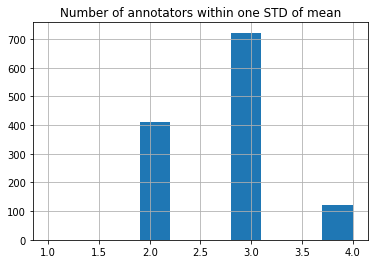

In [ ]:
# How many of each count exists? Let's find out by plotting...
histogramframe = pd.DataFrame(num_of_annotations_similar)
histogramframe = histogramframe.rename(columns={0:"Number of annotators within one STD of mean"})
histo = histogramframe.hist()
